In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 10]


import sys
sys.path.append('../../')
from src.utilities import load_serialized_object, data_path

Using TensorFlow backend.


In [2]:
import pydot
print pydot.find_graphviz()

AttributeError: 'module' object has no attribute 'find_graphviz'

# UIUC

In [5]:
vgg16_history = load_serialized_object(data_path('uiuc', '224_224', 'model', 'vgg16', 'hist_20171026-111034_20171026-111859.pkl'))
resnet50_history = load_serialized_object(data_path('uiuc', '224_224', 'model', 'resnet50', 'hist_20171026-113510_20171026-113556.pkl'))
inceptionv3_history = load_serialized_object(data_path('uiuc', '224_224', 'model', 'inceptionv3', 'hist_20171026-111859_20171026-113510.pkl'))

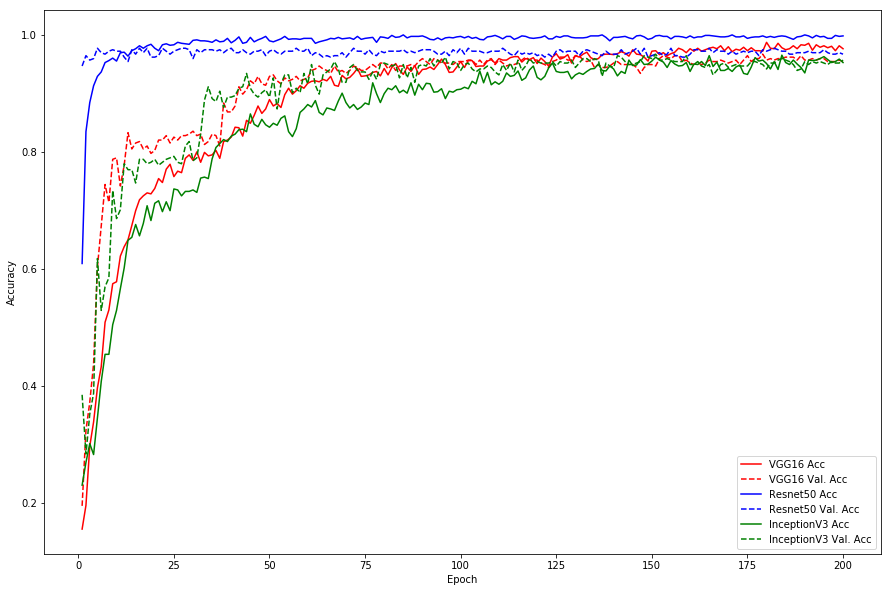

In [6]:
plt.plot(range(1, 1+len(vgg16_history['acc'])), vgg16_history['acc'], label='VGG16 Acc', color='r')
plt.plot(range(1, 1+len(vgg16_history['val_acc'])), vgg16_history['val_acc'], label='VGG16 Val. Acc', linestyle='--', color='r')
plt.plot(range(1, 1+len(resnet50_history['acc'])), resnet50_history['acc'], label='Resnet50 Acc', color='b')
plt.plot(range(1, 1+len(resnet50_history['val_acc'])), resnet50_history['val_acc'], label='Resnet50 Val. Acc', linestyle='--', color='b')
plt.plot(range(1, 1+len(inceptionv3_history['acc'])), inceptionv3_history['acc'], label='InceptionV3 Acc', color='g')
plt.plot(range(1, 1+len(inceptionv3_history['val_acc'])), inceptionv3_history['val_acc'], label='InceptionV3 Val. Acc', linestyle='--', color='g')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Kaggle Dog vs Cat

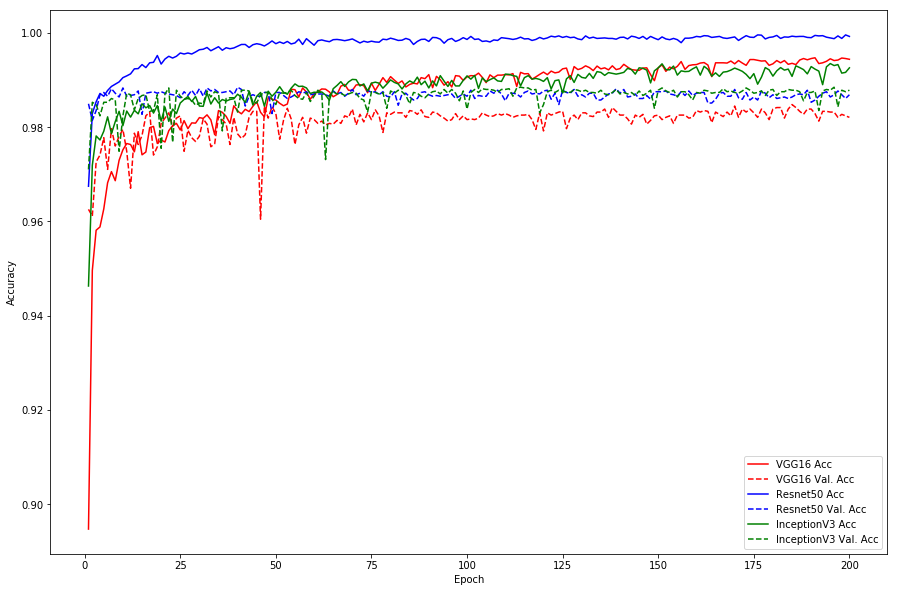

In [5]:
vgg16_history = load_serialized_object(data_path('kaggle_dog_cat', '224_224', 'model', 'vgg16', 'hist_20171025-201858_20171025-222636.pkl'))
resnet50_history = load_serialized_object(data_path('kaggle_dog_cat', '224_224', 'model', 'resnet50', 'hist_20171026-023144_20171026-024211.pkl'))
inceptionv3_history = load_serialized_object(data_path('kaggle_dog_cat', '224_224', 'model', 'inceptionv3', 'hist_20171025-222636_20171026-023144.pkl'))

plt.plot(range(1, 1+len(vgg16_history['acc'])), vgg16_history['acc'], label='VGG16 Acc', color='r')
plt.plot(range(1, 1+len(vgg16_history['val_acc'])), vgg16_history['val_acc'], label='VGG16 Val. Acc', linestyle='--', color='r')
plt.plot(range(1, 1+len(resnet50_history['acc'])), resnet50_history['acc'], label='Resnet50 Acc', color='b')
plt.plot(range(1, 1+len(resnet50_history['val_acc'])), resnet50_history['val_acc'], label='Resnet50 Val. Acc', linestyle='--', color='b')
plt.plot(range(1, 1+len(inceptionv3_history['acc'])), inceptionv3_history['acc'], label='InceptionV3 Acc', color='g')
plt.plot(range(1, 1+len(inceptionv3_history['val_acc'])), inceptionv3_history['val_acc'], label='InceptionV3 Val. Acc', linestyle='--', color='g')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Codalab Smile

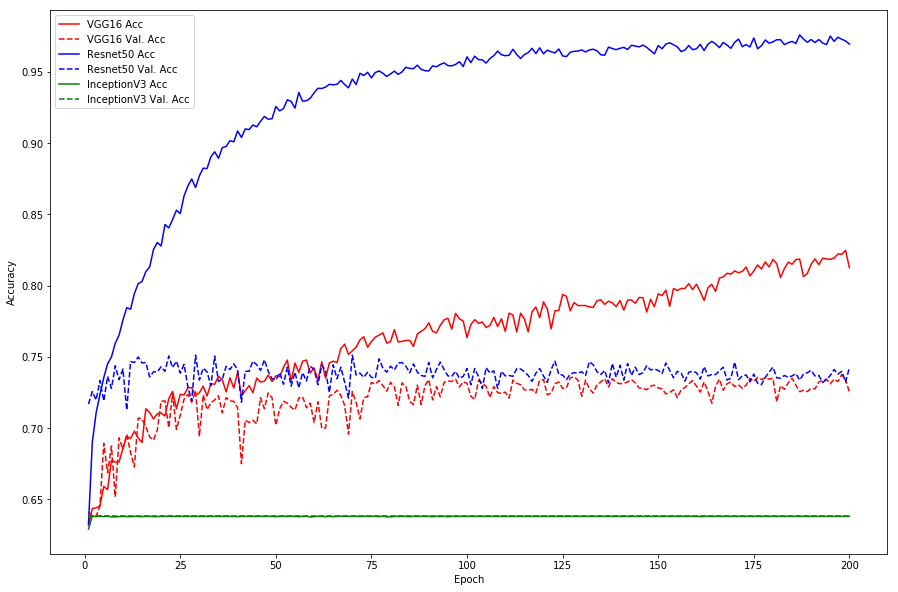

In [6]:
vgg16_history = load_serialized_object(data_path('codalab', '224_224', 'model', 'smile', 'vgg16', 'hist_20171025-155234_20171025-163533.pkl'))
resnet50_history = load_serialized_object(data_path('codalab', '224_224', 'model', 'smile', 'resnet50', 'hist_20171025-175749_20171025-180141.pkl'))
inceptionv3_history = load_serialized_object(data_path('codalab', '224_224', 'model', 'smile', 'inceptionv3', 'hist_20171025-163533_20171025-175749.pkl'))

plt.plot(range(1, 1+len(vgg16_history['acc'])), vgg16_history['acc'], label='VGG16 Acc', color='r')
plt.plot(range(1, 1+len(vgg16_history['val_acc'])), vgg16_history['val_acc'], label='VGG16 Val. Acc', linestyle='--', color='r')
plt.plot(range(1, 1+len(resnet50_history['acc'])), resnet50_history['acc'], label='Resnet50 Acc', color='b')
plt.plot(range(1, 1+len(resnet50_history['val_acc'])), resnet50_history['val_acc'], label='Resnet50 Val. Acc', linestyle='--', color='b')
plt.plot(range(1, 1+len(inceptionv3_history['acc'])), inceptionv3_history['acc'], label='InceptionV3 Acc', color='g')
plt.plot(range(1, 1+len(inceptionv3_history['val_acc'])), inceptionv3_history['val_acc'], label='InceptionV3 Val. Acc', linestyle='--', color='g')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Codalab Gender

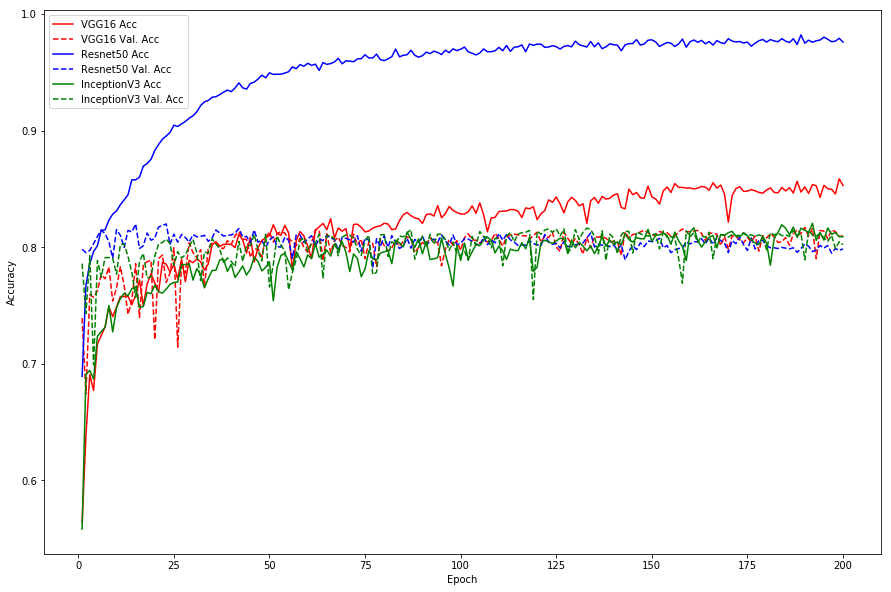

In [7]:
vgg16_history = load_serialized_object(data_path('codalab', '224_224', 'model', 'gender', 'vgg16', 'hist_20171025-181011_20171025-185306.pkl'))
resnet50_history = load_serialized_object(data_path('codalab', '224_224', 'model', 'gender', 'resnet50', 'hist_20171025-201508_20171025-201858.pkl'))
inceptionv3_history = load_serialized_object(data_path('codalab', '224_224', 'model', 'gender', 'inceptionv3', 'hist_20171025-185306_20171025-201507.pkl'))

plt.plot(range(1, 1+len(vgg16_history['acc'])), vgg16_history['acc'], label='VGG16 Acc', color='r')
plt.plot(range(1, 1+len(vgg16_history['val_acc'])), vgg16_history['val_acc'], label='VGG16 Val. Acc', linestyle='--', color='r')
plt.plot(range(1, 1+len(resnet50_history['acc'])), resnet50_history['acc'], label='Resnet50 Acc', color='b')
plt.plot(range(1, 1+len(resnet50_history['val_acc'])), resnet50_history['val_acc'], label='Resnet50 Val. Acc', linestyle='--', color='b')
plt.plot(range(1, 1+len(inceptionv3_history['acc'])), inceptionv3_history['acc'], label='InceptionV3 Acc', color='g')
plt.plot(range(1, 1+len(inceptionv3_history['val_acc'])), inceptionv3_history['val_acc'], label='InceptionV3 Val. Acc', linestyle='--', color='g')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()